In [1]:
include("../src/MCMCDiffusion.jl")

MCMCDiffusion

In [4]:
using Plots,LaTeXStrings, MCMCDiffusion

In [5]:
pyplot()

Plots.PyPlotBackend()

In [7]:
N = 10^6
beta = -1.8
to = 8
res, acc = rMCMC(to, N, beta; T = Float64)

([0.93379 0.314271; 0.735161 1.01417; … ; 0.817656 5.4284; 0.817646 4.74154], 0.330884)

In [8]:
##Theoretical \rho y \rho_\beta
function Z(beta, ts)
    to = BigInt(ts)
    yes(to) = append!([0.], [1/2. + i for i in 0:to])
    ces(to) = [binomial((2*to), (to-i)) for i in 0:to]*(0.5)^(2*to)*2.
    cep = ces(to)
    yep = yes(to)
    exps = [exp(-beta*(yep[i])) - exp(-beta*yep[i + 1])  for i in 1:to+1]
    product = cep .* exps
    result = sum(product)
    result /= beta
end

function theor_dist(r, ts)
    ts = BigInt(to)
    2*binomial(2*to, floor(Int, (r + 1/2 + to)))*0.5^(2*to) ##Theoretical distribution for any t_o
end

function rhob(r, beta, to)
    theor_dist(r, to)*exp.(-beta*r)/Z(beta, to)
end

rhob (generic function with 1 method)


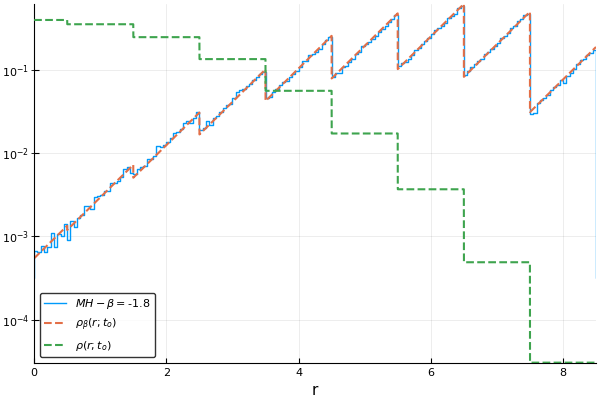

In [9]:
ymax = (to+1/2.)
yrange = linspace(0., ymax-0.001, 10000)
histog = stephist(res[:,2], normed = true, yscale = :log10, label = L"MH - \beta = "*"$beta", xlabel = "r")
plot!(yrange,  [rhob(k, beta, to) for k in yrange], yscale = :log10, label = L"\rho_{\beta}(r;t_o)", line = :dash, lw = 1.5)
plot!(yrange, [theor_dist(k, to) for k in yrange], yscale = :log10, label = L"\rho(r;t_o)", line = :dash, lw = 1.5)

In [10]:
## Compared with the Gaussian

function gaussian(r, to)
    ts = BigInt(to)
    D = 1/4
    sigma = sqrt(2*D*ts)
    f = 1/sigma*sqrt(2/pi)*exp(-r^2/(2*sigma^2))
end
    

gaussian (generic function with 1 method)


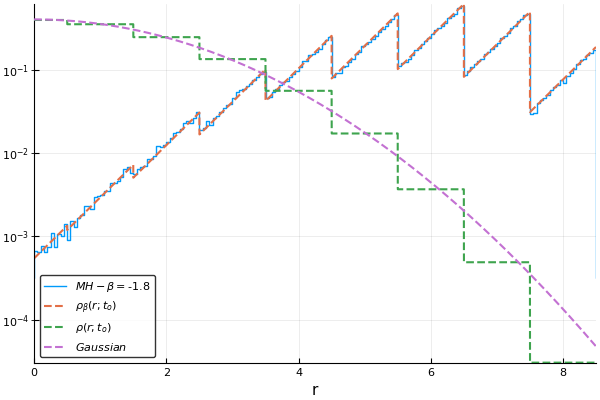

In [11]:
plot!(yrange, [gaussian(k, to) for k in yrange], yscale = :log10,
    label = L"Gaussian", line = :dash, lw = 1.5)